# Изучение рынка игр

Из открытых источников доступны данные о продажах игр, их оценках, жанрах и платформах. Необходмо выявить определяющие успешность игры закономерности.

## Оглавление:
* [Шаг 1. Откроем файл с данными и изучим общую информацию.](#1)
* [Шаг 2. Подготовим данные.](#2)
* [Шаг 3. Проведем исследовательский анализ данных.](#3)
* [Шаг 4. Составим портрет пользователя каждого региона.](#4)
* [Шаг 5. Проверим гипотезы.](#5)
* [Шаг 6. Напишем общий вывод.](#6)

### Шаг 1. Откроем файл с данными и изучим общую информацию. <a class="anchor" id="1"></a>

Импортируем библиотеки:

In [1]:
# <импорт библиотеки pandas>
import pandas as pd

# <импорт библиотеки matplotlib для построения графиков>
import matplotlib.pyplot as plt

# <импорт библиотеки seaborn для построения графиков>
import seaborn as sns

# <импорт библиотеки numpy>
import numpy as np

# <импорт библиотеки scipy>
from scipy import stats as st

# <импорт библиотеки math>
import math

# <код, благодаря которму графики отображаются с первого раза>
%matplotlib inline

# <код, благодаря которму датафреймы по ширине будут отображаться полностью>
pd.set_option('display.max_columns', None)

Прочитаем файл, датафрейм сохраним в переменную:

In [2]:
# <Читаем файл из csv и сохраняем в переменную>
df_games = pd.read_csv('/datasets/games.csv')

Рассмотрим информацию о датафрейме и первые 5 его строк:

In [3]:
# <рассмотрим таблицу df_games>
print(df_games.info())
df_games.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Рассмотрим полученную информацию подробнее.

Всего в таблице 11 столбцов, типы данных у столбцов различаются.

Подробно разберём, какие в *df_games* столбцы и какую информацию они содержат:

* *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы долларов)
* *EU_sales* — продажи в Европе (миллионы долларов)
* *JP_sales* — продажи в Японии (миллионы долларов)
* *Other_sales* — продажи в других странах (миллионы долларов)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Мы имеем игры, а также информацию о них - платформа, год релиза, жанр, продажи в разных регионах мира, оценки пользователей и критиков, а также рейтинг определяющий возрастную категорию.

### Вывод

В следующем шаге мы будем подготавливать данные к анализу, следующие проблемы видны сразу:

* Неверный тип данных у года релиза, оценок критиков и оценок пользователей.
* Пропуски в оценках критиков, пользователей, а также в возрастном рейтинге. Иногда это связано с тем что игра слишком старая, и тогда еще не существовало ассоциации, присваивающей возрастной рейтинг; сайтов аггрегирующих оценки; данные собирались недостаточно усердно. Но в целом по некоторым играм в интернете можно найти значения пропусков возрастного рейтинга. Их можно было бы заполнить с помощью парсинга, но это выходит за рамки данной работы.

Приступим к подготовке данных.

### Шаг 2. Подготовим данные. <a class="anchor" id="2"></a>

* Заменим названия столбцов (приведем к нижнему регистру):

In [4]:
# <Приведем названия столбцов к нижнему регистру>
df_games.columns = df_games.columns.str.lower()

* Преобразуем данные в нужные типы. 

В столбце *user_score* изменим тип данных после преобразования значения *tbd*.

Преобразуем тип данных в столбцах оценок критиков и дат релиза игр, и это мы можем сделать даже с пропусками поставив аргумент *Int64* в атрибуте *astype*:

In [5]:
df_games['critic_score'] = df_games['critic_score'].astype('Int64')

In [6]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

Мне прекрасно известно что актуальный период сейчас идет с 2013 года, когда были выпущены приставки PS4 и Xbox One. Мы видим что данные с пропущенным годом релиза минимально касаются актуального периода (два блока кода ниже). Это первая причина от них избавиться.

Вторая - их нельзя использовать для исследования продаж по годам.

Однако два момента: первое - мы заполним года там где название игры одно и то же. (например Call of Duty: Black Ops). А также для исследования игр, где необходим год релиза будет использован датафрейм без пропусков в годах.

In [7]:
# <Посчитаем сколько игр относятся к актуальным приставкам>
df_games[(df_games['year_of_release'].isnull()) & (df_games['platform'] == 'XOne')]['name'].count()

0

In [8]:
# <Посчитаем сколько игр относятся к актуальным приставкам>
df_games[(df_games['year_of_release'].isnull()) & (df_games['platform'] == 'PS4')]['name'].count()

0

In [9]:
# <Посчитаем сколько игр относятся к персональному компьютеру>
df_games[(df_games['year_of_release'].isnull()) & (df_games['platform'] == 'PC')]['name'].count()

17

* Обработаем пропуски:

In [10]:
# <посмотрим в каких колонках пропущено много значений>
(df_games.isnull().sum()/df_games.shape[0]*100).sort_values(ascending = False)

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
genre               0.011965
name                0.011965
other_sales         0.000000
jp_sales            0.000000
eu_sales            0.000000
na_sales            0.000000
platform            0.000000
dtype: float64

Не будем восполнять пропуски в *critic_score*, так как это будет некорректно и исказит данные. Перейдем к столбцу *rating*:

In [11]:
# <посмотрим какие значения в столбце rating>
df_games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

RP(Rating Pending) - значение означающее что рейтинг в процессе установления, часто бывает при маркетинговой компании игры, когда ассоциация еще не установила рейтинг.

K-A - старое значение ESRB, в 1996 замененное на E (Everyone).

Не имеет смысла заменять пропуски ни одним из этих значений. Когда мы будем исследовать влияние рейтинга на продажи в регионе, чтобы грамотно оценить значения с RP, нам будет необходимо иметь 3 значения а не более чем несколько тысяч игр с таким рейтингом, которые на самом деле в реальности имеют другой.

Перейдем к столбцу *user_score*, посмотрим какие в нем есть значения:

In [12]:
# <посмотрим какие значения в столбце user_score>
df_games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
1.5       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Значение *tbd* расшифровывается как "to be determinated" - будет определен. Это значит что на сайте-агрегаторе недостаточно оценок пользователей для определения оценки. Вы не поверите, но адекватным решением будет превратить их в NaN, мы просто должны представить что они отсутствуют как таковые. Заполнить нам их нечем, также как и остальные пропуски, любые заполнения по медиане и среднему будут некорректны, исказят данные.

In [13]:
# <Преобразуем значения tbd в NaN>
df_games['user_score'].replace('tbd', np.nan, inplace=True)

In [14]:
# <Преобразуем тип данных в float64>
df_games['user_score'] = pd.to_numeric(df_games['user_score'],errors = 'coerce')

По поводу года релиза решение принято - в исследованиях, требующих год релиза будет использована выборка с годом релиза. Но попробуем все-таки убрать часть пропусков.

In [15]:
# <количество пропусков>
df_games[df_games['year_of_release'].isnull()]['platform'].count()

269

In [16]:

def fixing_year(data):
    for row in data.query("year_of_release.isnull()", engine='python').index:
        i=0
        while ~(data.loc[row, 'year_of_release'] > -1) and i < data[data['year_of_release'] >= 0].index.shape[0]:
            for row1 in data[data['year_of_release'] >= 0].index:
                if data.loc[row, 'name'] == data.loc[row1, 'name']:
                    data.loc[row, 'year_of_release'] = data.loc[row1, 'year_of_release']
                i += 1
        
fixing_year(df_games)    

In [17]:
df_games[df_games['year_of_release'].isnull()]['platform'].count()

146

В 123 значениях были восстановлены пропуски в годах релиза. Функция конечно отрабатывает долго.

Перейдем к жанру и имени:

In [18]:
# <посмотрим строки с пропусками в genre>
df_games[df_games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [19]:
# <посмотрим строки с пропусками в name>
df_games[df_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это одни и те же строки. Избавимся от них так как старая платформа не повлияет на результаты исследования.

In [20]:
# <Удалим строки с пропусками>
df_games = df_games[~(df_games['genre'].isnull())].reset_index(drop= True)

Причины которые могли привести к пропускам:
* Отсутствие оценки критиков, ошибка парсинга, неверный формат оценки.
* Оценка пользователей была в процессе определения, но записалась не как "tbd" из-за ошибки парсинга, неверный формат оценки, смена сайта-агрегатора, отсутствие игры на сайте-агрегаторе оценок.
* Отсутствие возрастного рейтинга у игры, ошибка парсинга, ошибка со стороны ESRB.
* Ошибка парсинга у старой игры, у которой нет имени и жанра. Но есть продажи =)

_______________________________________________________________________________________________________________________________



* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [21]:
# <Запишем в столбец world_sales суммарный продажи во всех регионах>
df_games['world_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales'] 

### Вывод

* Мы сменили тип данных у даты релиза, оценок критиков и оценок пользователей. Даты целые, оценки критиков целые, оценки пользователей лежат в пределах от одного до 10 и потому дробные.
* Пропуски в оценках, годах и возрастном рейтинге заполнить каким либо  из Single-imputation methods(https://basegroup.ru/community/articles/missing) было бы некорректно, мы можем заполнить их реальными значениями, но это слишком тяжело с точки зрения трудозатрат.
* Мы заполнили часть пропусков в годе релиза, а также попытались объяснить причины пропусков.
* На мой взгляд этой выборки достаточно для проведения исследования.

Перейдем к исследовательскому анализу данных.

### Шаг 3. Проведем исследовательский анализ данных <a class="anchor" id="3"></a>

* Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [22]:
# <Сделаем сводную таблицу где сгруппируем данные году релиза и посчитаем их количество>
years_pivot = df_games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
years_pivot.columns = ['count']
years_pivot.reset_index(inplace = True)
years_pivot.tail(10)

,year_of_release,count
27,2007,1202
28,2008,1440
29,2009,1431
30,2010,1270
31,2011,1153
32,2012,662
33,2013,547
34,2014,582
35,2015,606
36,2016,502


Уже тут можно заметить тренд, перед последним поколением приставок игры стали выпускаться реже, но "качественее" (так задумывалось). Их разработка становилась дольше.

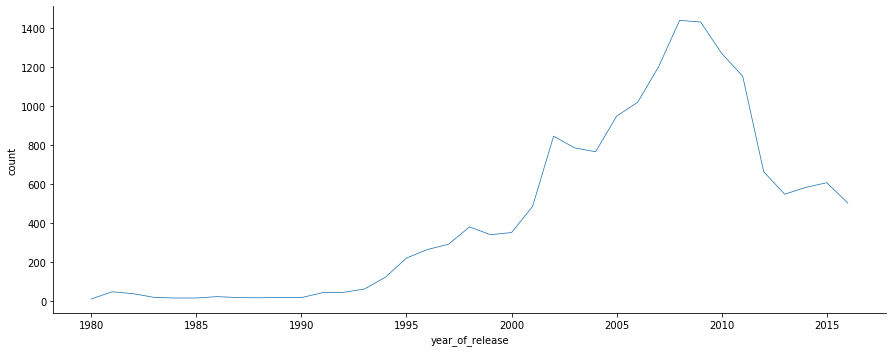

In [23]:
# <Построим график-линию с помощью билиотеки seaborn>
sns.relplot(x="year_of_release", y="count", kind="line", data=years_pivot , size=2, aspect=2.5, legend = False)

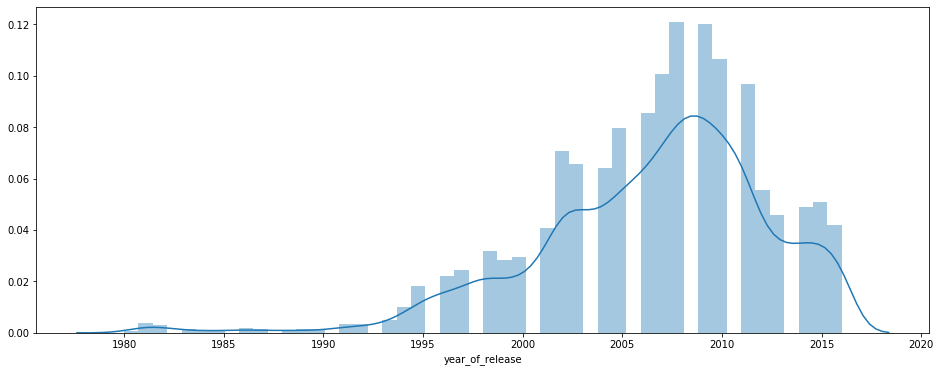

In [24]:
plt.figure(figsize=(16, 6))
# <Построим гисттограмму распределения с помощью билиотеки seaborn>
sns.distplot(df_games[~(df_games['year_of_release'].isnull())]['year_of_release'])

Важны ли данные за все периоды для решения задачи? Нет, можно использовать данные, начиная с 2012 года. Количество выпущенных игр уменьшилось, так как новое поколение консолей задало тренд на долгую разработку.

* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [25]:
# <Сделаем сводную таблицу где сгруппируем данные по платформе, затем подсчитаем сумму продаж>
sumsales_pivot = df_games.pivot_table(index = 'platform', values = 'world_sales', aggfunc = 'sum')
sumsales_pivot.columns = ['sum_sales']
sumsales_pivot.reset_index(inplace = True)
sumsales_pivot.sort_values(by = 'sum_sales', ascending= False).head()

,platform,sum_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


In [26]:
# <Сделаем сводную таблицу где сгруппируем данные по платформе и году релиза, затем подсчитаем сумму продаж для каждого года>
sumsalesyear_pivot = df_games.pivot_table(index = ['platform','year_of_release'], values = 'world_sales', aggfunc = 'sum')
sumsalesyear_pivot.columns = ['sum_sales']
sumsalesyear_pivot.reset_index(inplace = True)
sumsalesyear_pivot.tail(10)

,platform,year_of_release,sum_sales
233,XB,2003,56.27
234,XB,2004,65.97
235,XB,2005,49.09
236,XB,2006,10.04
237,XB,2007,0.55
238,XB,2008,0.18
239,XOne,2013,18.96
240,XOne,2014,54.07
241,XOne,2015,60.14
242,XOne,2016,26.15


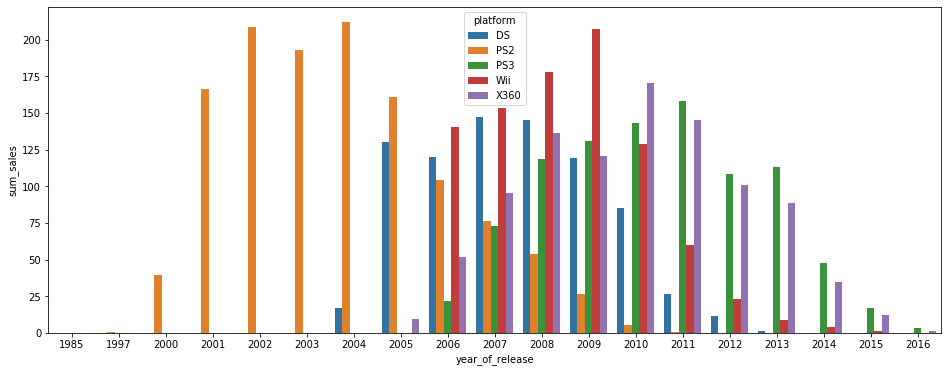

In [27]:
# <Построим barplot который наглядно покажет сколько живут платформы>
plt.figure(figsize=(16, 6))
top_platform = sumsalesyear_pivot.query('platform in ["PS2","X360","PS3","Wii","DS"]')
ax = sns.barplot(x="year_of_release", y="sum_sales", hue="platform", data=top_platform)

In [28]:
# <другой способ посчитать жизненный цикл платформы>
top_platform.count()/5

platform           11.8
year_of_release    11.8
sum_sales          11.8
dtype: float64

За 10 лет платформа успевает появится и исчезнуть. Это можно рассмотреть на графике, посчитав столбики и затем разделив их на их количество платформ.

* Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитываем в работе данные за предыдущие годы.

Мы подобрали период начиная с 2012 года.

* Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [29]:
# <Сделаем датафрейм с информацией по играм за "актуальный период">
final_df = df_games[df_games['year_of_release'] >= 2012]

# <Сделаем сводную таблицу где сгруппируем данные по платформе и году релиза, затем подсчитаем сумму продаж для каждого года>
sumsalesyear_pivot_2012 = final_df.pivot_table(index = ['platform','year_of_release'], values = 'world_sales', aggfunc = 'sum')
sumsalesyear_pivot_2012.columns = ['sum_sales']
sumsalesyear_pivot_2012.reset_index(inplace = True)
sumsalesyear_pivot_2012.tail(10)

,platform,year_of_release,sum_sales
39,WiiU,2016,4.60
40,X360,2012,100.72
41,X360,2013,88.58
42,X360,2014,34.74
43,X360,2015,11.96
44,X360,2016,1.52
45,XOne,2013,18.96
46,XOne,2014,54.07
47,XOne,2015,60.14
48,XOne,2016,26.15


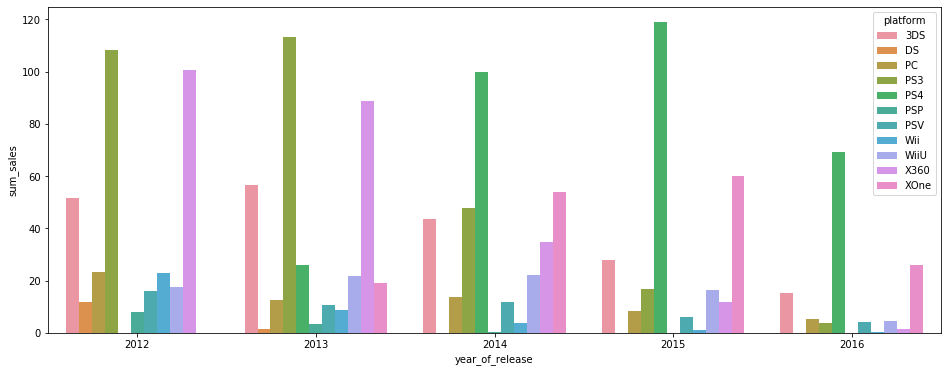

In [30]:
# <Построим barplot который наглядно покажет сколько живут платформы>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="year_of_release", y="sum_sales", hue="platform", data=sumsalesyear_pivot_2012)

Лидирует по по продажам Playstation. Последнее поколение в конце периода и предпоследнее в начале периода.

Как только вышло новое поколение PS4 и XOne , просели по продажам приставки тех же компаний предыдущего поколения X360 и PS3.

Выберем три потенциально прибыльных платформы. Это подходит под понятие "несколько". Самая прибыльная - PS4. Далее прямой конкурент XOne. И 3DS, который заметно им проигрывает, но все еще жив. В Японии =)

* Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишем результат.

Создадим датафрейм куда поместим показатели продаж по годам для трех выбранных нами платформ, затем построим "ящик с усами":

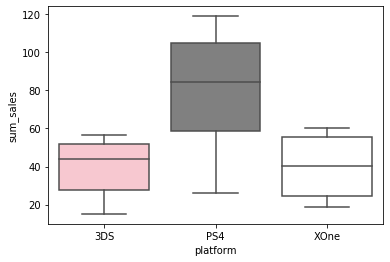

In [31]:
# <Построим boxplot, который наглядно покажет каковы средние продажи выбранных нами платформ>
top_platform_2012 = sumsalesyear_pivot_2012.query('platform in ["PS4","XOne","3DS"]')

sns.boxplot(x="platform", y="sum_sales",
            palette=["pink", "gray", "white"],
            data=top_platform_2012)

Между прямыми конкурентами PS4 и Xbox One довольна велика разница в продажах, там где у Xbox One третий квартиль, у PS4 первый.  Продукт от Microsoft никогда не обгонял PS4 по продажам игр. И есть еще очень важная особенность - довольно близки средние продажи у портативной приставки 3DS и XOne. И это при том что тренд на портативные приставки в 2012-2016 уже пропал, заменившись играми на мобильном телефоне.

* Посмотритм, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Возьмем платформу PS4:

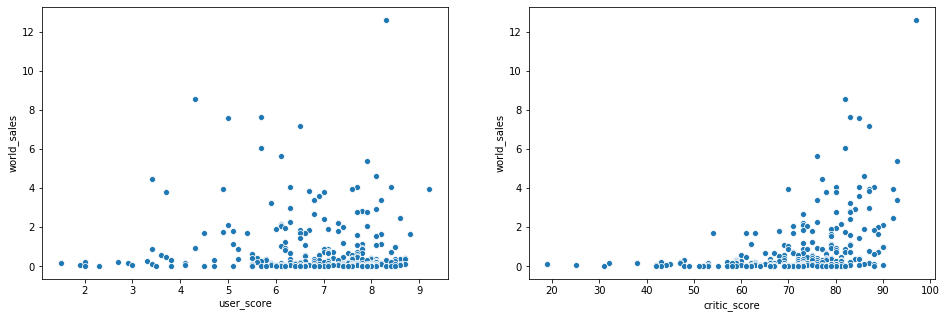

In [32]:
# <Построим диаграммы рассеяния>
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.relplot(x='user_score', y='world_sales', data = final_df[final_df['platform'] == 'PS4'], ax = ax1)
sns.relplot(x='critic_score', y='world_sales', data = final_df[final_df['platform'] == 'PS4'], ax = ax2)
# <Добавим эти строки, так как без них создаются два пустых графика, это особенность метода sns.relplot>
plt.close()
plt.close()

In [33]:
# <вызовем метод corr() для подсчета связи между столбцами>
print(final_df[final_df['platform'] == 'PS4'].loc[:, ['world_sales', 'critic_score','user_score']].corr())

              world_sales  critic_score  user_score
world_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000    0.557654
user_score      -0.031957      0.557654    1.000000


Судя по графикам, большая часть игр не зарабатывает больше 1 млн. какая бы хорошая у нее не была оценка. Однако среди тех что зарабатывают много, большая часть лежит после оценки 5 у пользователей и 60 у критиков.

Значение корреляции оценок критиков с продажами показывает прямую среднюю по силе связь. Но выборка мала, чтобы судить точно. А вот корреляции между оценками пользователей и продажами почти нет, она очень слабая отрицательная. Можно сказать что ее нет. Можно сделать вывод что оценки критиков намного сильнее влияют на продажи, чем оценки пользователей.

* Соотнесем выводы с продажами игр на других платформах.

Проверим выводы посмотрев на графики и корреляцию у приставки Xbox One:

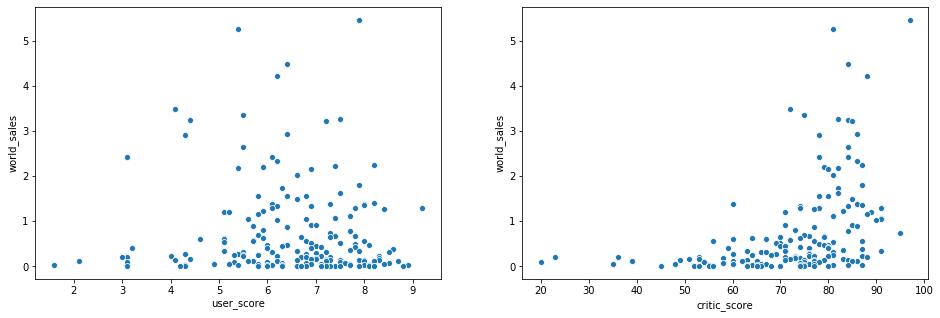

In [34]:
# <Построим диаграммы рассеяния>
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.relplot(x='user_score', y='world_sales', data = final_df[final_df['platform'] == 'XOne'], ax = ax1)
sns.relplot(x='critic_score', y='world_sales', data = final_df[final_df['platform'] == 'XOne'], ax = ax2)
# <Добавим эти строки, так как без них создаются два пустых графика, это особенность метода sns.relplot>
plt.close()
plt.close()

In [35]:
# <вызовем метод corr() для подсчета связи между столбцами>
print(final_df[final_df['platform'] == 'XOne'].loc[:, ['world_sales', 'critic_score','user_score']].corr())

              world_sales  critic_score  user_score
world_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000


Выводы те же, продажи растут после оценки критиков 70 у той части что заработали хотя бы 0.5-1 млн, в отличие от 60 на PS4. Корреляция такая же.

Проверим выводы посмотрев на графики и корреляцию у приставки 3DS:

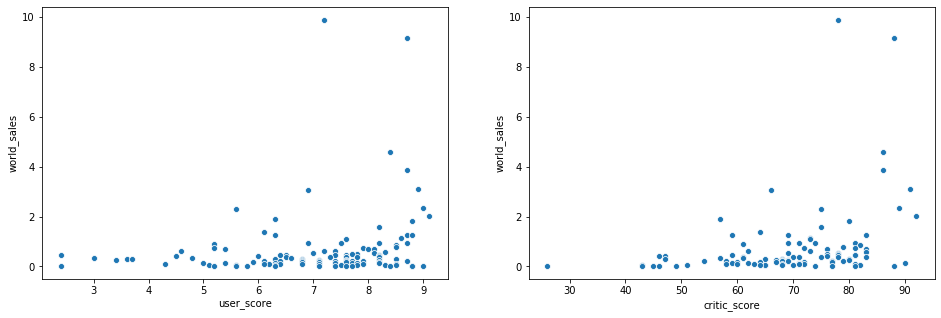

In [36]:
# <Построим диаграммы рассеяния>
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.relplot(x='user_score', y='world_sales', data = final_df[final_df['platform'] == '3DS'], ax = ax1)
sns.relplot(x='critic_score', y='world_sales', data = final_df[final_df['platform'] == '3DS'], ax = ax2)
# <Добавим эти строки, так как без них создаются два пустых графика, это особенность метода sns.relplot>
plt.close()
plt.close()

In [37]:
# <вызовем метод corr() для подсчета связи между столбцами>
print(final_df[final_df['platform'] == '3DS'].loc[:, ['world_sales', 'critic_score','user_score']].corr())

              world_sales  critic_score  user_score
world_sales      1.000000      0.320458    0.198150
critic_score     0.320458      1.000000    0.721517
user_score       0.198150      0.721517    1.000000


Выборка у этой приставки меньше. Судя по графикам, большая часть игр не зарабатывает больше 1 млн. какая бы хорошая у нее не была оценка. Однако среди тех что зарабатывают много, большая часть лежит после оценки 5 у пользователей и 60 у критиков. Также как и у PS4.

Значения корреляции оценок критиков с продажами и оценок пользователей с продажами показывает прямую средне-слабую связь. Но выборка мала, чтобы судить точно. Это отличается от домашних приставок. Видно что оценки пользователей положительно влияют на продажи.

* Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим bar plot на котором будет отчетливо видно какие жанры наиболее прибыльны:

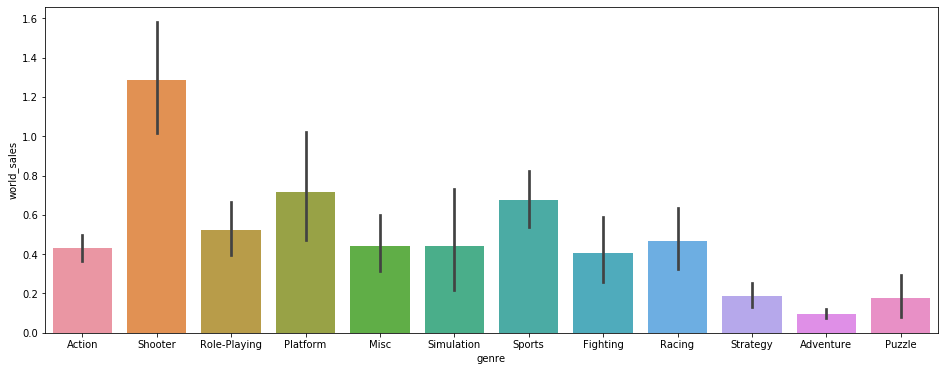

In [38]:
# <Построим barplot который наглядно покажет какие жанры самые прибыльные>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="genre", y="world_sales", data=final_df)

Выделяются:
1. Shooter
2. Platform
3. Sports
4. Role-Playing 
5. Racing. 

Самые низкие продажи у жанров:
1. Adventure
2. Puzzle
3. Strategy

Лидер - Shooter

Посмотрим статистику по нашим трем потенциально прибыльным платформам.

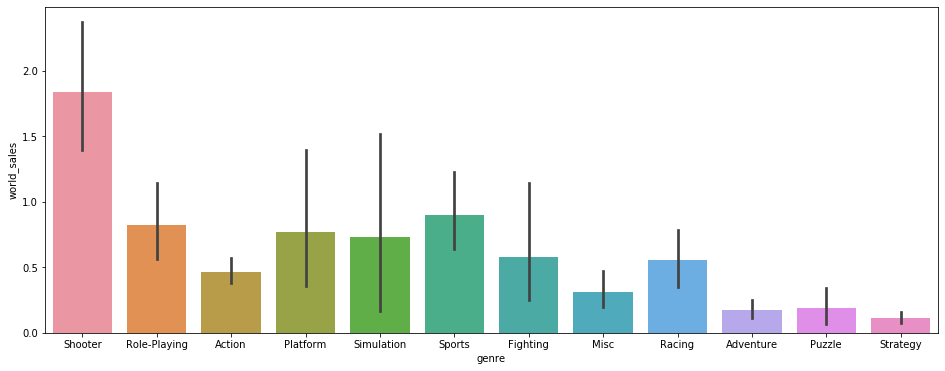

In [39]:
# <Построим barplot который наглядно покажет какие жанры самые прибыльные>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="genre", y="world_sales", data=final_df.query('platform in ["PS4","XOne","3DS"]'))

Выделяются:
1. Shooter
2. Sports
3. Role-Playing
4. Platform
5. Simulation. 

Очень похоже, чуть-чуть другой порядок, общий лидер и Simulation вместо Racing.
 
Самые низкие продажи у жанров:
1. Strategy
2. Adventure
3. Puzzle

Выделяется лидер продаж - шутер(стрелялка). И три жанра приносящие всегда мало продаж - стратегии, приключения, головоломки.

### Вывод

* Мы нашли актуальный период с 2012 по 2016, с начала которого рынок игр изменился, игр стало выпускаться меньше, разработка стала идти дольше, а также пришло новое поколение приставок.
* Определили с помощью графика за какой период появляются и исчезают платформы - около 10 лет.
* Посмотрев на продажи выделили несколько потенциально прибыльных платформ - PS4, Xbox One, и портативную приставку 3DS.
* Оценили тот факт что PS4 обогнал своего прямого конкурента Xbox One с помощью "ящика с усами", а также удивились тому что по продажам Xbox на одном уровне с 3DS.
* Узнали, оценив корреляцию и диаграммы рассеяния, что оценки критиков довольно слабо влияют на продажи. А оценки пользователей не влияют вообще, за исключением приставки 3DS.
* С помощью bar plot определили самые прибыльные и неприбыльные жанры игр.

### Шаг 4. Составим портрет пользователя каждого региона. <a class="anchor" id="4"></a>

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Будем использовать данные из актуального периода.

**Начнем с региона NA:**

Показатель популярности - сумма продаж всех игр на платформе.

In [40]:
# <Составим сводную таблицу, где подсчитаем продажи по платформам>
nagames_top = final_df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
nagames_top.reset_index(inplace = True)
nagames_top.sort_values('na_sales',ascending=False).head()

,platform,na_sales
9,X360,140.57
4,PS4,108.74
3,PS3,103.74
10,XOne,93.12
0,3DS,55.49


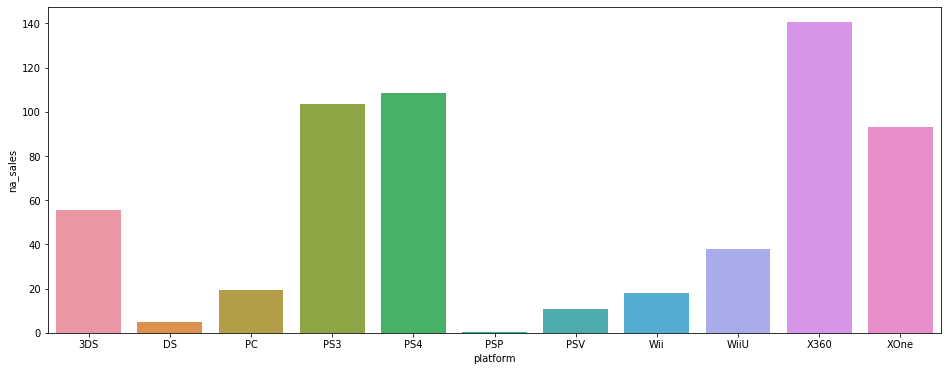

In [41]:
# <Построим barplot который наглядно покажет самые популярные платформы>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="platform", y="na_sales", data=nagames_top)

Самые популярные платформы Северной Америки:
1. X360
2. PS4
3. PS3
4. XOne
5. 3DS

Причина, почему первое место занимает Xbox 360, это как минимум тот факт, что в начале выбранного мною периода у этой приставки был пик продаж, затем пошедший на спад. PS3 тут по той же причине. Также довольно известный факт, что Xbox в США покупают чаще (это касалось прошлого поколения). Первые 4 места имеют примерно равные продажи, это связано с тем что это 4 домашние приставки из двух разных поколений, по 2 приставки от каждого конкурента. И наш период охватывает также угасание прошлого поколения после его пика, и высокие продажи нового поколения приставок, которые еще немного связаны также с обесцениванием денег.

Посмотрим самые популярные жанры:

In [42]:
# <Составим сводную таблицу, где подсчитаем продажи по жанрам>
nagenre_top = final_df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
nagenre_top.reset_index(inplace = True)
nagenre_top.sort_values('na_sales',ascending=False).head()

,genre,na_sales
0,Action,180.15
8,Shooter,144.79
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


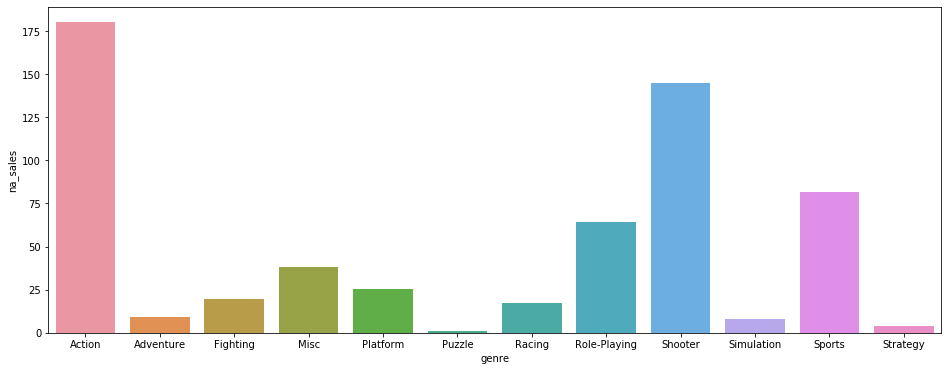

In [43]:
# <Построим barplot который наглядно покажет самые популярные жанры>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="genre", y="na_sales", data=nagenre_top)

Самые популярные жанры игр Северной Америки:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

In [44]:
# <Проверим почему Action так сильно выделяется>
final_df[final_df['genre'] == 'Action'].sort_values('na_sales', ascending = False).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
176,Assassin's Creed III,X360,2012,Action,3.13,1.69,0.03,0.44,84,6.7,M,5.29
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47


В основном из-за супер популярных продуктов Ubisoft и Rockstar. По остальным жанрам понятно, там скорее всего Call of Duty у Shooter, FIFA и Madden NFL у Sports. Так что я бы сказал что выделение этих жанров как лидеров - результат грамотного маркетинга от разработчиков и издателей, а также качества этих игр. Прошу заметить что GTA 5 разрабатывалась минимум 5 лет. Часть из жанров-лидеров были упомянуты в предыдущем шаге. Выделение Action и Misc - особенность этого региона

In [45]:
# <Проверим почему Misc так сильно выделяется>
final_df[final_df['genre'] == 'Misc'].sort_values('na_sales', ascending = False).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74,7.3,E10+,6.76
248,Nintendo Land,WiiU,2012,Misc,2.52,1.11,0.46,0.33,77,7.9,E10+,4.42
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,3.58


Комментировать нечего, это. просто. Minecraft.

Проверим, влияет ли рейтинг ESRB на продажи:

In [46]:
# <Составим сводную таблицу, где подсчитаем продажи по возрастному рейтингу>
na_esrb = final_df.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
na_esrb.reset_index(inplace = True)
na_esrb.sort_values('na_sales',ascending=False).head()

,rating,na_sales
2,M,231.67
0,E,114.37
1,E10+,77.93
3,T,66.02


Взрослый человек любит играть, и готов заплатить денег. За кровь на экране, недетский сюжет и так далее.

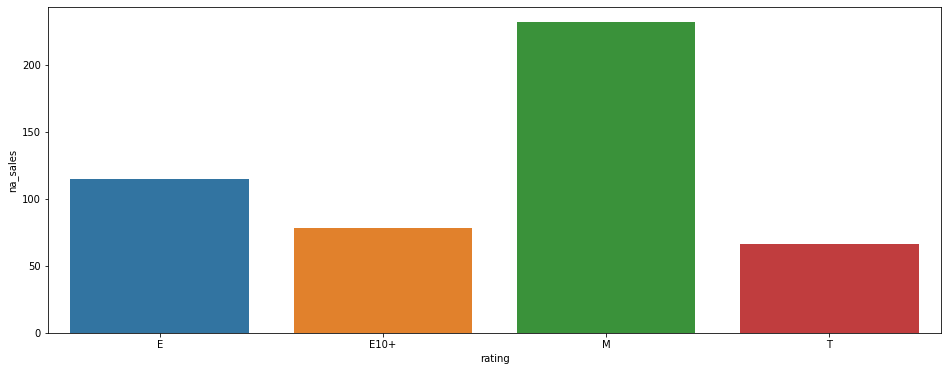

In [47]:
# <Построим barplot который наглядно покажет влияние рейтинга на продажи>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="rating", y="na_sales", data=na_esrb)

Игры, доступные для всех, показывают примерно одинаковый уровень продаж с играми для 10-летних и выше, и для подростков. Игры для взрослых сильно выделяются, также замечу, большинство геймеров уже с 10 лет играют в игры с рейтингом M. Всем хочется быстрее взрослеть =)

**Перейдем к региону EU:**

In [48]:
# <Составим сводную таблицу, где подсчитаем продажи по платформам>
eugames_top = final_df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
eugames_top.reset_index(inplace = True)
eugames_top.sort_values('eu_sales',ascending=False).head()

,platform,eu_sales
4,PS4,141.09
3,PS3,107.27
9,X360,74.89
10,XOne,51.59
0,3DS,42.83


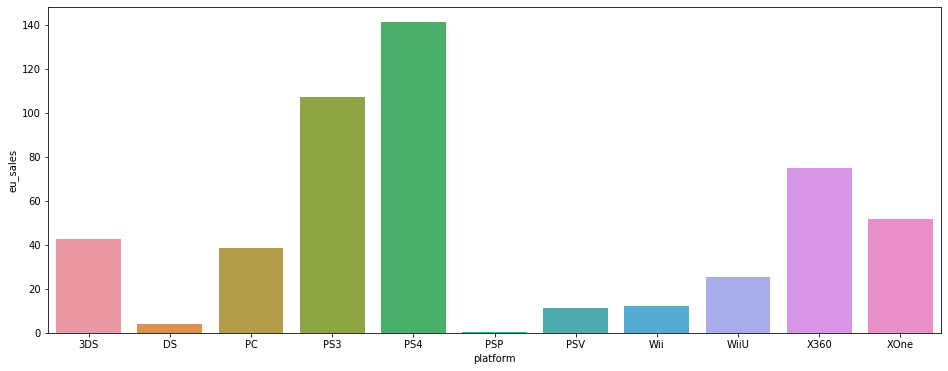

In [49]:
# <Построим barplot который наглядно покажет самые популярные платформы>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="platform", y="eu_sales", data=eugames_top)

Самые популярные платформы в Европе:
1. PS4
2. PS3
3. X360
4. XOne
5. 3DS

Известно что продукты Sony в Европе популярнее, тут больше любят эксклюзивы. Первые два места за приставками Sony, и практически в 2 раза меньше продажи у продуктов Microsoft. Их продажи примерно сравнимы с продажами 3DS.

Посмотрим самые популярные жанры:

In [50]:
# <Составим сводную таблицу, где подсчитаем продажи по жанрам>
eugenre_top = final_df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
eugenre_top.reset_index(inplace = True)
eugenre_top.sort_values('eu_sales',ascending=False).head()

,genre,eu_sales
0,Action,161.70
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


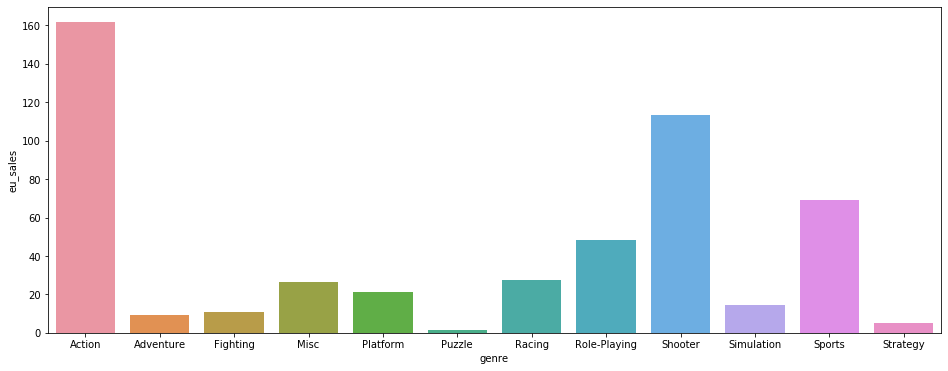

In [51]:
# <Построим barplot который наглядно покажет самые популярные жанры>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="genre", y="eu_sales", data=eugenre_top)

Самые популярные жанры игр в Европе:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

Результаты совпадают с показателями по Северной Америке, за исключением пятого места, но учитывая что у жанра Racing разница в продажах с Misc не слишком велика, можно сказать что есть полное совпадение вкусов по жанрам.

Проверим, влияет ли рейтинг ESRB на продажи:

In [52]:
# <Составим сводную таблицу, где подсчитаем продажи по возрастному рейтингу>
eu_esrb = final_df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
eu_esrb.reset_index(inplace = True)
eu_esrb.sort_values('eu_sales',ascending=False).head()

,rating,eu_sales
2,M,194.44
0,E,113.03
1,E10+,57.25
3,T,52.96


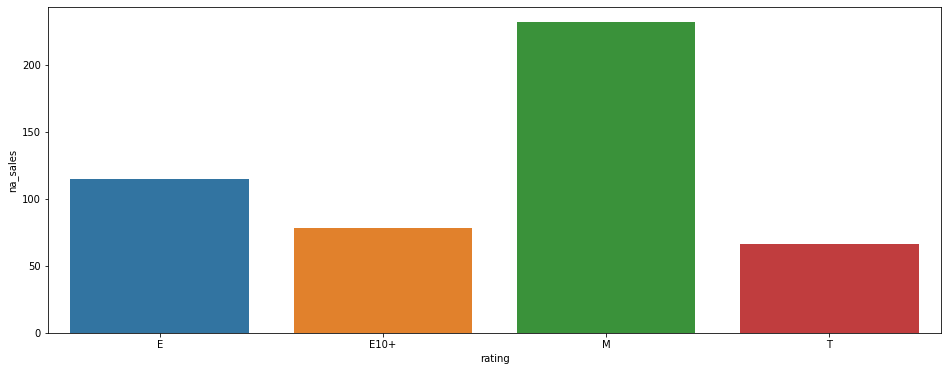

In [53]:
# <Построим barplot который наглядно покажет влияние рейтинга на продажи>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="rating", y="na_sales", data=na_esrb)

Выводы те же, что и по Северной Америке.

**Перейдем к региону JP:**

In [54]:
# <Составим сводную таблицу, где подсчитаем продажи по платформам>
jpgames_top = final_df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
jpgames_top.reset_index(inplace = True)
jpgames_top.sort_values('jp_sales',ascending=False).head()

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


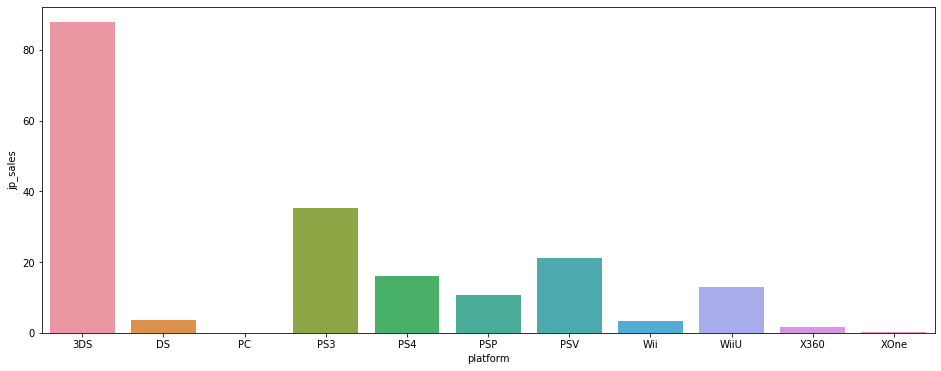

In [55]:
# <Построим barplot который наглядно покажет самые популярные платформы>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="platform", y="jp_sales", data=jpgames_top)

Самые популярные платформы Японии:
1. 3DS
2. PS3
3. PSV
4. PS4
5. WiiU

Японцы гораздо чаще пользуются портативными приставками, также замечу что подавляющее количество игр на приставку 3DS выпущено на японском языке. Остальные приставки имеют продажи примерно на одном уровне, несмотря на то что они из разных поколений, а PSV вообще считается неудачной портативной приставкой, но тем не менее в Японии игры на нее продаются.

Рассмотрим самые популярные жанры:

In [56]:
# <Составим сводную таблицу, где подсчитаем продажи по жанрам>
jpgenre_top = final_df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
jpgenre_top.reset_index(inplace = True)
jpgenre_top.sort_values('jp_sales',ascending=False).head()

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,13.10
9,Simulation,10.41
2,Fighting,9.44


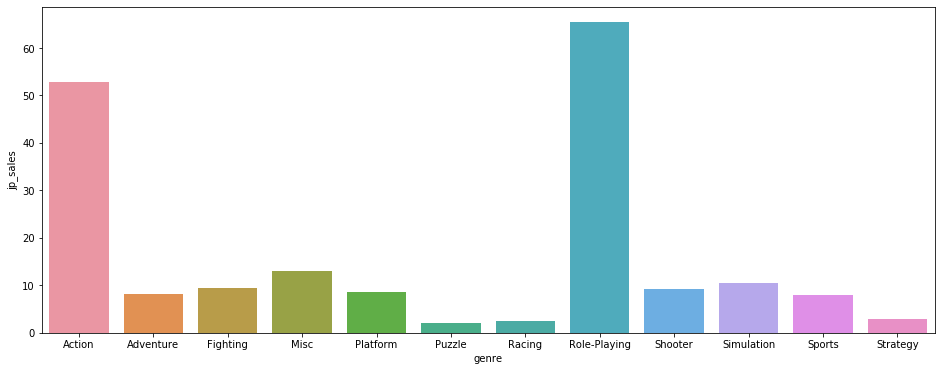

In [57]:
# <Построим barplot который наглядно покажет самые популярные платформы>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="genre", y="jp_sales", data=jpgenre_top)

Самые популярные жанры игр в Японии:
1. Role-Playing
2. Action
3. Misc
4. Simulation
5. Fighting

Есть определенные хиты среди каждого жанра, которые сделали распределение жанров именно таким. Но шутеры в Японии точно менее популярны - тут предпочитают кулаки и катану вместо пистолета. Также неудивительно и присутствие файтингов - они гораздо популярнее в Стране восходящего солнца, до сих популярны автоматы в игровых заведениях с этими играми.

Проверим, влияет ли рейтинг ESRB на продажи:

In [58]:
# <Составим сводную таблицу, где подсчитаем продажи по возрастному рейтингу>
jp_esrb = final_df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
jp_esrb.reset_index(inplace = True)
jp_esrb.sort_values('jp_sales',ascending=False).head()

,rating,jp_sales
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


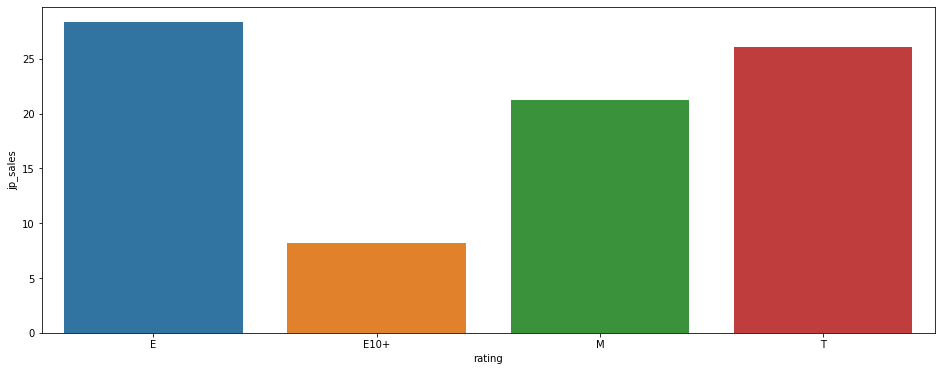

In [59]:
# <Построим barplot который наглядно покажет влияние рейтинга на продажи>
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="rating", y="jp_sales", data=jp_esrb)

Совершенно отличная ситуация от регионов Северной Америки и Европы. Сама по себе Япония - страна уникальная, но тут также играет фактор того что это отдельная страна, а те пласты что мы рассматривали до этого - огромные регионы. Рейтинг для всех, взрослый и подростковый имеют примерно равные продажи, что говорит о том что на рейтинг в Японии никто внимания не обращает. А также для большинства взрослых японцев поиграть в детскую игру - не зазорно. Малое количество продаж рейтинга E10+ связано с количеством игр с ним.

### Вывод

* Типичный пользователь NA: Играет в шутеры, экшны и спортивные симуляторы. С равной вероятностью имеет Xbox или PS3/PS4. Чаще предпочитает игры со взрослым рейтингом.
* Типичный пользователь EU: Играет в шутеры, экшны и спортивные симуляторы. С большей вероятностью имеет PS3/PS4 чем Xbox. Чаще предпочитает игры со взрослым рейтингом.
* Типичный пользователь JP: Играет в RPG, экшны и игры неопределенного жанра. Имеет портативную приставку 3DS. Ему не важен возрастной рейтинг.

### Шаг 5. Проверим гипотезы. <a class="anchor" id="5"></a>

Данный шаг все еще выполняется на выборке с 2012 года.

Необходимо проверить гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные;

Начнем с первой. Сформулируем нулевую и альтернативную гипотезы:

**H₀:** Средние пользовательских рейтингов игр на платформах Xbox One и PC равны.

**H₁:** Средние пользовательских рейтингов игр на платформах Xbox One и PC не равны.

In [60]:
# <Посчитаем средние пользовательские рейтинги платформ Xbox One и PC>
xbox_mean = final_df[final_df['platform'] == 'XOne']['user_score'].mean()
pc_mean = final_df[final_df['platform'] == 'PC']['user_score'].mean()
print('Средняя пользовательская оценка на платформе Xbox One:', xbox_mean)
print('Средняя пользовательская оценка на платформе PC:', pc_mean)

Средняя пользовательская оценка на платформе Xbox One: 6.521428571428572
Средняя пользовательская оценка на платформе PC: 6.4454976303317535


In [61]:
# <Создадим переменные для наших выборок с пользовательскими рейтингами платформ Xbox One и PC>
xbox_score = final_df[final_df['platform'] == 'XOne']['user_score'].dropna()
pc_score = final_df[final_df['platform'] == 'PC']['user_score'].dropna()

Для проверки гипотезы применим критерий Стьюдента (проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам) Подберем уровень значимости (*alpha*) равный 0.05.

In [62]:
# <Уровень значимости>
alpha = 0.05

# <Метод библиотеки scipy, позволяющий проверить гипотезу о равенстве двух средних>
results =  st.ttest_ind(
    xbox_score, 
    pc_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, cредние пользовательских рейтингов игр на платформах Xbox One и PC примерно равны. На этой выборке. Результаты исследования подтверждают наш подсчет средних на выборках выше.

Проверим гипотезу о том что:
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные;

Сформулируем нулевую и альтернативную гипотезы:

**H₀:** Средние пользовательских рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») равны.

**H₁:** Средние пользовательских рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») не равны.

In [63]:
# <Посчитаем средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта»)>
action_mean = final_df[final_df['genre'] == 'Action']['user_score'].mean()
sports_mean = final_df[final_df['genre'] == 'Sports']['user_score'].mean()
print('Средняя пользовательская оценка жанра Action:', action_mean)
print('Средняя пользовательская оценка жанра Sports:', sports_mean)

Средняя пользовательская оценка жанра Action: 6.834274952919022
Средняя пользовательская оценка жанра Sports: 5.455897435897437


In [64]:
# <Создадим переменные для наших выборок с пользовательскими рейтингами жанров>
# <Action (англ. «действие») и Sports (англ. «виды спорта»)>
action_score = final_df[final_df['genre'] == 'Action']['user_score'].dropna()
sports_score = final_df[final_df['genre'] == 'Sports']['user_score'].dropna()

Для проверки гипотезы применим критерий Стьюдента (проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам) Подберем уровень значимости (*alpha*) равный 0.05.

In [65]:
# <Уровень значимости>
alpha = 0.05

# <Метод библиотеки scipy, позволяющий проверить гипотезу о равенстве двух средних>
results =  st.ttest_ind(
    action_score, 
    sports_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу


Вероятность того что гипотеза **H₀** верна крайне мала, судя по p - значению. Результаты исследования подтверждают то что мы увидели выше , средние рейтинги отличаются на 1.38 балла, для пользовательской оценки это много. На основе данной выборки мы можем сказать что альтернативная гипотеза верна.

### Вывод

* Как я формулировал нулевую и альтернативную гипотезы? Прежде всего по теории в спринте мне известно что в нулевой гипотезе должно быть знак равенства. А альтернативная гипотеза должна быть альтернативой нулевой гипотезе.
* Критерий и метод scipy был выбран исходя из заданий в тренажере в спринта, в нашей работе речь идет о выборках и о равенстве средних в них. Соответственно это проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, и метод *.ttest_ind*
* p_value полученные нами после теста не дают двояких выводов по этой выборке, обе гипотезы были подтверждены.

### Шаг 6. Напишите общий вывод. <a class="anchor" id="6"></a>

* Судя по играм с самыми большими продажами, закономерность влияющая на успех игры - это правильно выбранная платформа, жанр, долгая и качественная разработка. Если вы продаете на территории NA и EU, нужно сделать выбор в пользу возрастного рейтинга M(18+). На территории JP этот фактор не так важен.
* Прогноз на 2017 год: Стоит выпустить для рынков EU и NA экшн рейтинга M на обоих приставках PS4 и Xbox One, предварительно долго его разрабатывая, купить оценки критиков. И большие продажи у вас в кармане!
* На этапе подготовки данных был сделан вывод о том что множество показателей нельзя восстановить, так как их некорректная замена приведет к искажению данных.
* На этапе исследования уже стали довольно четкими те факторы которые важны для успеха игры.
* Построив портреты пользователей из разных регионов, мы сделали вывод о том что портреты пользователей из Европы и Северной Америки неслабо совпадают, и имеет смысл сделать упор на них, а не на сложный и крайне специфичный японский рынок.
* Проверив гипотезы, мы убедились что у домашних приставок и PC оценки находятся примерно в одной области, это ожидаемо, так как довольно часто игры выходят на PC, PS4 и Xbox One одновременно. А также убедились в том что спортивные симуляторы, которые штампуются пачками и часто не сильно отличаютcя от предыдущих частей в среднем имеют оценку ниже чем типичный экшен.